## Business Problem
The main aim of analyzing the backorder data is to find out the reason due to which a particular product is not in stock when a potential customer whished to buy it. Therefore, the companies are looking for to explore the cause of backorder and the solution which might be used to minimize the backorder and increase the business.
There are several causes that could be the reason of backorder
* Delayed in placing the order - Based on the ordercycle, stock etc. orders are placed to the vendor daily, weekly or even it takes a month or some time interval. Even after placing the order an individual person reviewed the order and came out with a conclusion that whether the particular order is need to be executed or not. For a delay in decision making results a backorder.
* Warehouse Discrepancies - A discrepancies may occure when the stock maintained digitally or by some mannual measure is not matched with the actual stock quantity present in warehouse.
* On other hand human error which is caused by some issue of an individual person can cause a backorder. 
* If the production in factories is lacking due to their internal issue, which no E-commerce can control by their own can lead to backorder.
* High Demand caused due to large numbers of order placement by customers. This can be a result for customer purchasing in an abnormal manner or for some seasonal demand like festive season. For this type of situation, we must find out the reason behind this demand.

## ML Formulation
Identifying products with the highest chances of shortage prior its occurrence can present a high opportunity to improve an overall company's performance. Machine learning is applied on the design and development of predictive models which assess all areas of management, providing essential insights for companies to understand and take action to changes in its operation.

## Accuracy metric
* **ROC-AUC:** The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values.The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. So, if for a model say m1 AUC > m2 AUC then at most of the threhold values model m1 is able to identify the positive class better than negative class.
* **Precision Recall AUC:** Precision is measued as out of the total number of predicted positive points percentage of actual positive prediction. 
        Mathematically Pr = TP/(TP+FP). 
    On the other hand recall is measured as the percentage of actual positive prediction out of the total number of positive points in the dataset. 
        Mathemetically Rc = TP/(TP+FN). 
    Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class). As it is an imbalance dataset the precision and recall make it possible to assess the performance of a classifier on the minority class. AUC of Pr-Re curve is very important as the business needs to select the suitable threshold based on treade off b/w precision and recall.

## Data Source
The data is taken form the github of the following link https://github.com/rodrigosantis1/backorder_prediction which stated that the main source of data is from Kaggle's "Can You Predict Product Backorders?"

In [1]:
!pip3 install tensorflow

In [2]:
!pip3 install keras

In [3]:
!pip3 install imblearn

In [4]:
!pip3 install xgboost

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils import shuffle

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix

%matplotlib inline
from matplotlib import pyplot as plot

In [6]:
train_df = pd.read_csv('train.csv')

In [7]:
train_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


## Shape of training data

In [8]:
train_df.shape

(1687861, 23)

The dataset contain **1687861 number of rows (records)** and **23 number of cloumns (features).**

The dataset contain total 23 number of columns which are as follows

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

The columns are of **2 different** datatypes viz - **1. Object** and **2. float64.** So we can say that the columns which have datatype of float64 are contain **numarical features (total 15 no. of numarical features)** and the columns which have datatype of object are **contain categorical features (total 8 no. of categorical features).**

The dataset columns contain following data
* **sku** – Stock Keeping Unit for the product (In is actually a unique id for every variation of the product)
* **national_inv** - Current inventory level for the part
* **lead_time** - Transit time for product (if available)
* **in_transit_qty** - Amount of product in transit from source
* **forecast_3_month** - Forecast sales for the next 3 months
* **forecast_6_month** - Forecast sales for the next 6 months
* **forecast_9_month** - Forecast sales for the next 9 months
* **sales_1_month** - Sales quantity for the prior 1 month time period
* **sales_3_month** - Sales quantity for the prior 3 month time period
* **sales_6_month** - Sales quantity for the prior 6 month time period
* **sales_9_month** - Sales quantity for the prior 9 month time period
* **min_bank** - Minimum recommended amount to stock
* **potential_issue** - Source issue for part identified
* **pieces_past_due** - Parts overdue from source
* **perf_6_month_avg** - Source performance for prior 6 month period
* **perf_12_month_avg** - Source performance for prior 12 month period
* **local_bo_qty** - Amount of stock orders overdue
* **deck_risk** - Part risk flag
* **oe_constraint** - Part risk flag
* **ppap_risk** - Part risk flag
* **stop_auto_buy** - Part risk flag
* **rev_stop** - Part risk flag
* **went_on_backorder** - Product actually went on backorder. This is the target value.

## Separating the list of categorical and numarical features

In [10]:
categorical_features = []
numarical_features = []
for col in train_df.columns:
    if (train_df.dtypes[col] == 'object'):
        categorical_features.append(col)
    else:
        numarical_features.append(col)
print(categorical_features)
print(numarical_features)

['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']
['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']


For better data visualisation we had split the **columns into 2 list of categorical and numarical data features**.

## Finding out the exsistance of null values in dataset

In [11]:
number_of_null_values_for_every_column = train_df.isnull().sum()
percentage_of_null_values_for_every_column = ((100*train_df.isnull().sum())/train_df.count())
null_percentage_df = pd.concat([number_of_null_values_for_every_column, percentage_of_null_values_for_every_column], axis=1, keys=['No. of missing Values', 'Percentage'])
null_percentage_df

,No. of missing Values,Percentage
sku,0,0.000000
national_inv,1,0.000059
lead_time,100894,6.357662
in_transit_qty,1,0.000059
forecast_3_month,1,0.000059
forecast_6_month,1,0.000059
forecast_9_month,1,0.000059
sales_1_month,1,0.000059
sales_3_month,1,0.000059
sales_6_month,1,0.000059


* From the above code sinppet we can say that the **lead_time column contain 100894 null values out of 1687861 which is 6.357%** of total number of data and it is significant number with respect to other columns. 
* Another important thing is noticed that the **dependent variable of type categorical is also include a nan value for a single row**, which we have to remove for better prediction. 

## Findout the record which have dependent variable as "nan" and remove it from original dataset

In [12]:
train_df[train_df['went_on_backorder'].isna()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
train_df.drop(index = 1687860,inplace = True)

In [14]:
train_df['lead_time'].fillna(train_df['lead_time'].mean(),inplace=True)

## Cross check the null values

In [15]:
number_of_null_values_for_every_column = train_df.isnull().sum()
percentage_of_null_values_for_every_column = ((100*train_df.isnull().sum())/train_df.count())
null_percentage_df = pd.concat([number_of_null_values_for_every_column, percentage_of_null_values_for_every_column], axis=1, keys=['No. of missing Values', 'Percentage'])
null_percentage_df

,No. of missing Values,Percentage
sku,0,0.0
national_inv,0,0.0
lead_time,0,0.0
in_transit_qty,0,0.0
forecast_3_month,0,0.0
forecast_6_month,0,0.0
forecast_9_month,0,0.0
sales_1_month,0,0.0
sales_3_month,0,0.0
sales_6_month,0,0.0


## Basic statistics of features

In [16]:
train_df[numarical_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1687860.0,7.872267,6.841885,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


The above list shows the **basic statistics of numarical features** which includes the **total number of values for each column, minimum, maximum values for each columns, percentile values etc.**

In [17]:
train_df[categorical_features].describe().transpose()

,count,unique,top,freq
sku,1687860,1687860,1375557,1
potential_issue,1687860,2,No,1686953
deck_risk,1687860,2,No,1300377
oe_constraint,1687860,2,No,1687615
ppap_risk,1687860,2,No,1484026
stop_auto_buy,1687860,2,Yes,1626774
rev_stop,1687860,2,No,1687129
went_on_backorder,1687860,2,No,1676567


The above list shows the **basic statistics of categorical features** which includes the **total number of values for each column, total unique values for each columns, top most values etc.**

From the above snippet we can say
1. **"lead_time"** column has large number of nan values (missing values) with respect to the other columns of the dataset which is replaced by the mean of that column data.
2. From the **"sku"** column statistics we can say that there are total 1687861 numbers of unique product variants available in the given dataset.
3. Most of the product varients did not went to backorder list as the top value of **went_back_order** feature is **No.**

## Specific numbers of product varients records that went backorder

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64

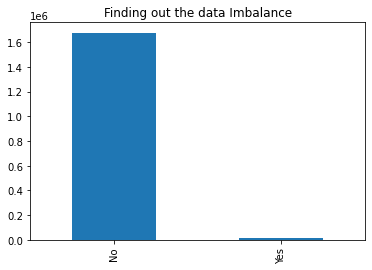

In [18]:
train_df['went_on_backorder'].value_counts().plot.bar()
plot.title("Finding out the data Imbalance")
train_df['went_on_backorder'].value_counts()

Total no of **training data points are 1687860** and among them **11293 data had gone on back order.** So it implies that only **0.66%** of the training dataset **has gone on backorder**, which is **highly imbalanced.**

## Univariate analysis

In [19]:
for feature in categorical_features:
    print(feature+" has following uinque values:")
    print(train_df[feature].unique())
    print("-"*100)

sku has following uinque values:
[1026827 1043384 1043696 ... '1524346' '1439563' '1502009']
----------------------------------------------------------------------------------------------------
potential_issue has following uinque values:
['No' 'Yes']
----------------------------------------------------------------------------------------------------
deck_risk has following uinque values:
['No' 'Yes']
----------------------------------------------------------------------------------------------------
oe_constraint has following uinque values:
['No' 'Yes']
----------------------------------------------------------------------------------------------------
ppap_risk has following uinque values:
['No' 'Yes']
----------------------------------------------------------------------------------------------------
stop_auto_buy has following uinque values:
['Yes' 'No']
----------------------------------------------------------------------------------------------------
rev_stop has following uinq

We can see that except **"sku"** all the **categorical variables** has only **2 unique values Yes and No**

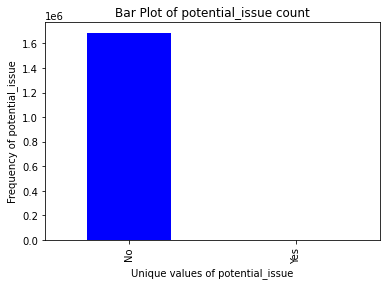

No     1686953
Yes        907
Name: potential_issue, dtype: int64


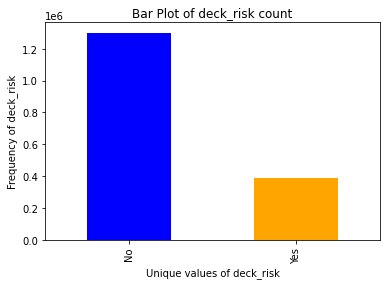

No     1300377
Yes     387483
Name: deck_risk, dtype: int64


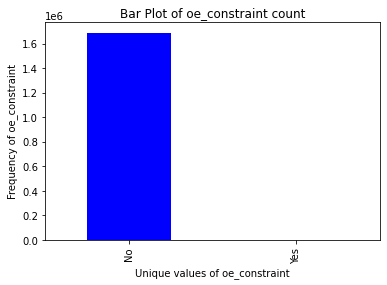

No     1687615
Yes        245
Name: oe_constraint, dtype: int64


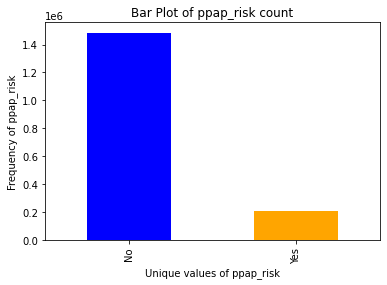

No     1484026
Yes     203834
Name: ppap_risk, dtype: int64


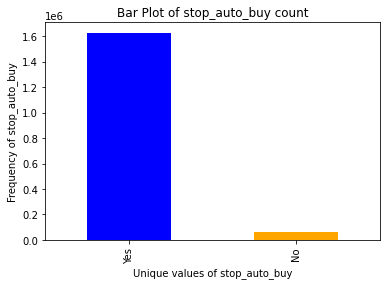

Yes    1626774
No       61086
Name: stop_auto_buy, dtype: int64


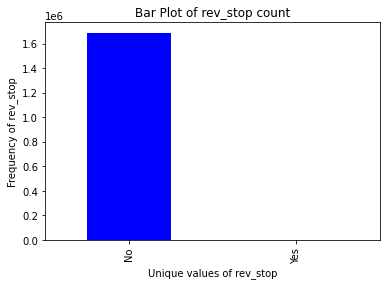

No     1687129
Yes        731
Name: rev_stop, dtype: int64


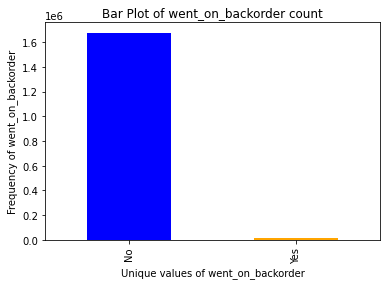

No     1676567
Yes      11293
Name: went_on_backorder, dtype: int64


In [20]:
for feature in categorical_features:
    if(feature != 'sku'):
        train_df[feature].value_counts().plot.bar(color=['blue','orange'])
        plot.title("Bar Plot of "+feature+" count")
        plot.ylabel("Frequency of "+feature)
        plot.xlabel("Unique values of "+ feature)
        plot.show()
        print(train_df[feature].value_counts())
        plot.close()

For all the categorical variables No is majority. Also in context to all the categorical variable data is highly imbalance.

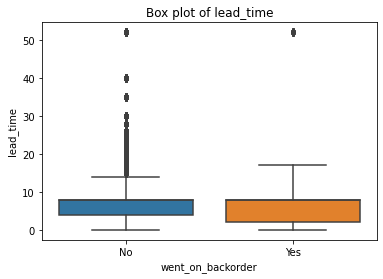

In [21]:
# sns.kdeplot(train_df['lead_time'], hue=train_df['went_on_backorder'])
# plot.title("Histogram Plot of lead time")
# plot.show()
# plot.close()
sns.boxplot(x='went_on_backorder',y='lead_time', data=train_df).set_title('Box plot of lead_time')
plot.show()
plot.close()

* On the top whisker of the majority class there are few outelires which need to be removed.
* The 50th percentile is almost similar to the 75th percentile as we replace the missing value with the mean.

In [22]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [23]:
train_df = remove_outlier(train_df, 'lead_time')

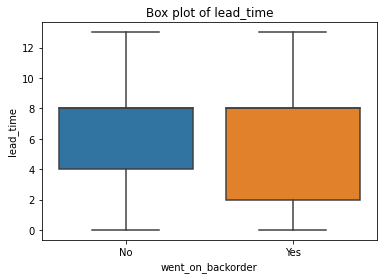

In [24]:
sns.boxplot(x='went_on_backorder',y='lead_time', data=train_df).set_title('Box plot of lead_time')
plot.show()
plot.close()

In [25]:
train_df.shape

(1629448, 23)

So after removing the outlire the number of rows of the dataset is reduced down to **16299448** and from the above bosplot we can see that there is no such outlires.

## Find out corelation among the features

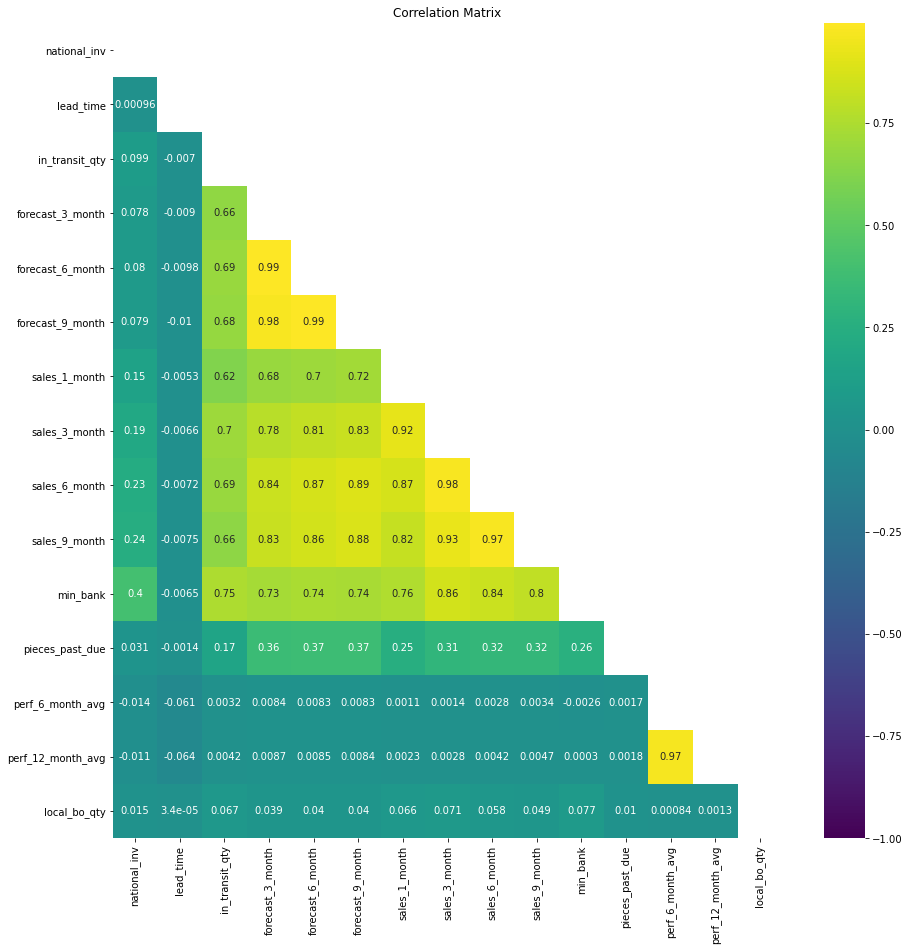

In [26]:

corr_matrix = train_df[numarical_features].corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plot.figure(figsize = (15,15))
plot.title('Correlation Matrix')
sns.heatmap(corr_matrix,
            vmin=-1,
            cmap='viridis',
            annot=True,
            mask = mask)
plot.show()

From the above corelation matrix we can observe that the following independant variable have high corellation, which are as follows - 
* **forecast_3_month,forecast_6_month,forecast_9_month** have corelation at around 0.99. So we can say those 3 features will show nearly same behaviour. We can pick one of them for the final model.
* **sales_1_month,sales_3_month,sales_6_month,sales_9_month** have corelation ranges from 0.82 to 0.92. So we can say those 4 features will show nearly same behaviour. We can pick one of them for the final model.
* **pref_6_month_avg, pref_12_month_avg** have corelation at around 0.97. So we can say those 2 features will show nearly same behaviour. We can pick one of them for the final model.

## Impact of numarical features with respect to target

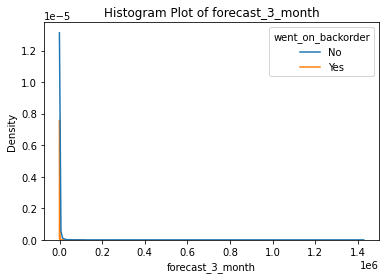

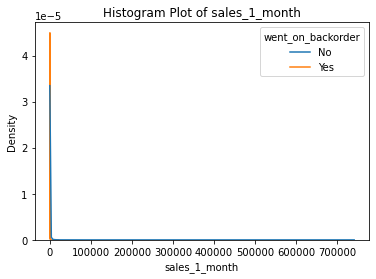

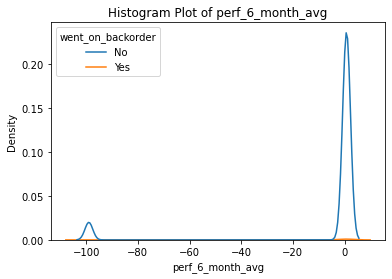

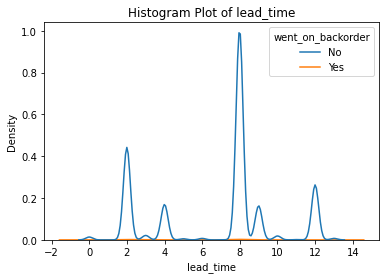

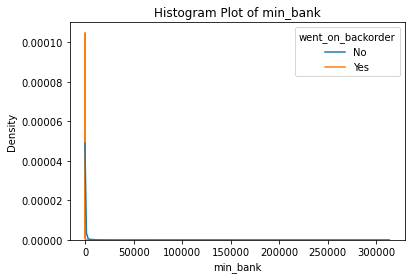

In [27]:
numarical_features_subset = ['forecast_3_month', 'sales_1_month', 'perf_6_month_avg', 'lead_time', 'min_bank']
for feature in numarical_features_subset:
    sns.kdeplot(train_df[feature], hue=train_df['went_on_backorder'])
    plot.title("Histogram Plot of "+feature)
    plot.show()
    plot.close()

From the above plots we find that when the prediction for the future sale is low as well as the past sale quantity is very low then only the possibility of backorder happen. Which implied that products which have low sales and low demand there is a  possibility of went on backorder.

## Impact of categorical features with respect to the target

went_on_backorder        No       Yes
potential_issue                      
No                 0.993189  0.006811
Yes                0.943630  0.056370


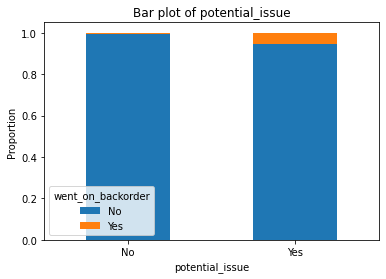

went_on_backorder        No       Yes
deck_risk                            
No                 0.992729  0.007271
Yes                0.994706  0.005294


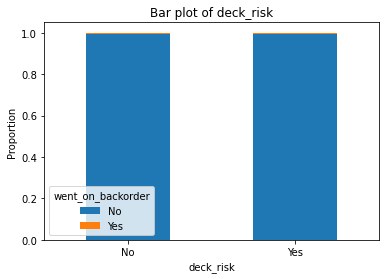

went_on_backorder        No       Yes
oe_constraint                        
No                 0.993166  0.006834
Yes                0.967347  0.032653


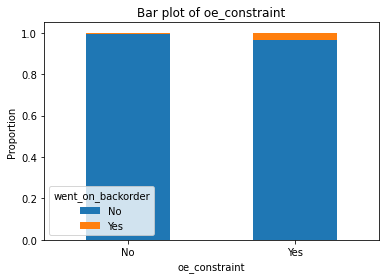

went_on_backorder        No       Yes
ppap_risk                            
No                 0.993446  0.006554
Yes                0.991076  0.008924


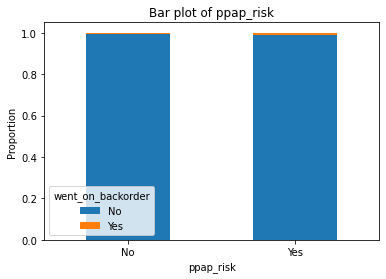

went_on_backorder        No       Yes
stop_auto_buy                        
No                 0.990632  0.009368
Yes                0.993238  0.006762


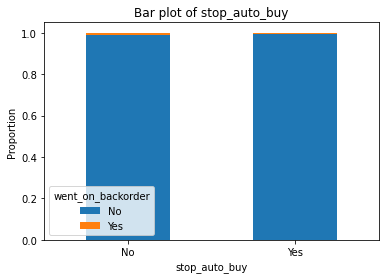

went_on_backorder        No       Yes
rev_stop                             
No                 0.993159  0.006841
Yes                1.000000       NaN


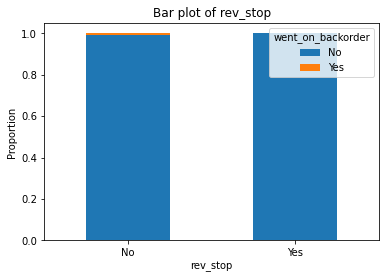

In [28]:
for feature in categorical_features:
    if(feature != 'sku' and feature != 'went_on_backorder'):
        counts_df = train_df.groupby([feature, "went_on_backorder"])["sku"].count().unstack()
        percentage_df = counts_df.T.div(counts_df.T.sum()).T
        print(percentage_df)
        fig, ax = plot.subplots()
        percentage_df.plot(kind="bar", stacked=True, ax=ax)
        ax.set_xlabel(feature)
        ax.set_xticklabels(['No','Yes'], rotation=0)
        ax.set_ylabel("Proportion")
        ax.set_title("Bar plot of "+feature)
        plot.show()
        plot.close()

* If potential_issue flag is 'Yes' then there is 5.6% chance of item going to back order.
* For the changes in deck_risk flag there is no such significant changes noted in the decision making whether the product will went on back order or not.
* If potential_issue flag is 'Yes' then there is 3.26% chance of item going to back order.
* For the changes in ppap_risk flag there is no such significant changes noted in the decision making whether the product will went on back order or not.
* For the changes in stop_auto_buy flag there is no such significant changes noted in the decision making whether the product will went on back order or not.
* For rev_stop no item went to backorder if rev_stop flag is set to Yes. For rev_stop = 'No' the proportion of orders that did go to back order and that weren't is same as class ratio that is 99.33 % : 0.667%

### As the numarical features are right skewed so we can check whether they follow log normal distribution or not by using QQ plot 

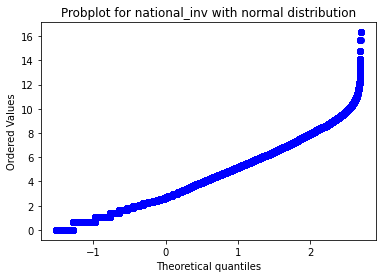

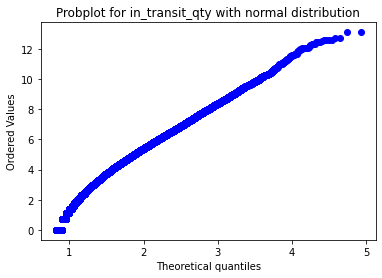

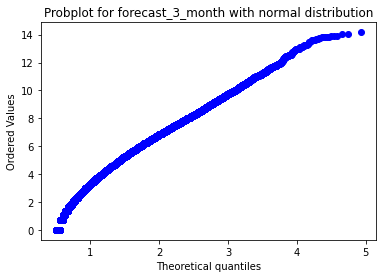

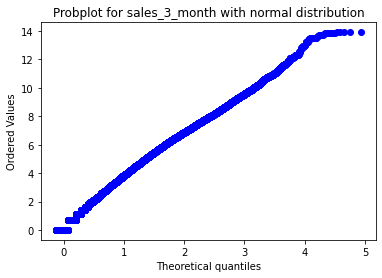

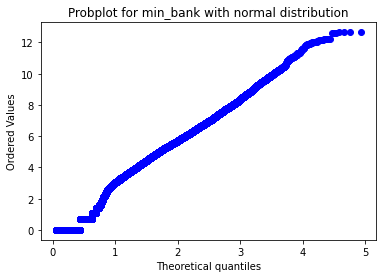

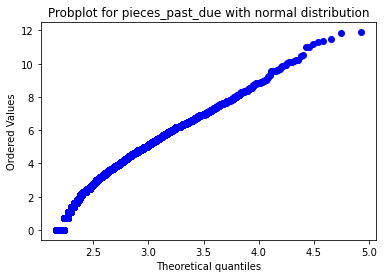

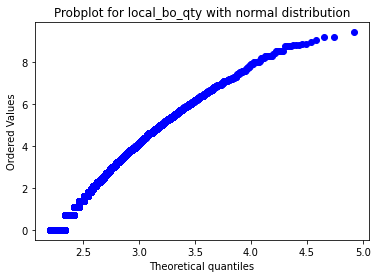

In [29]:
skewed_right_subset = ['national_inv' , 'in_transit_qty', 'forecast_3_month', 'sales_3_month', 'min_bank','pieces_past_due','local_bo_qty']
for feature in skewed_right_subset:
    fgr = plot.figure()
    ax = fgr.add_subplot(111) 
    sa = stats.probplot(np.log(train_df[feature].values),plot=ax)
    ax.set_title("Probplot for "+feature+" with normal distribution")
    plot.show()

As we got approximately straight line with 45 degree angle on the plot between log transformed feature and the normal distribution we can say that the above subset of features are fall under log normal distribution.

## Feature Engineering

In performance feature columns there are some values which is (-99.0) unexpected for that feature. We can say that it is some missing values and we replaced it by NaN

In [30]:
train_df.perf_12_month_avg.replace({-99.0 : np.nan}, inplace = True)
train_df.perf_6_month_avg.replace({-99.0 : np.nan}, inplace = True)

In [31]:
for feature in categorical_features:
    if(feature != 'sku'):
        train_df[feature] = train_df[feature].map({"Yes" : 1, "No" : 0}) 

### Train test split

In [32]:
y = y_hyp = train_df['went_on_backorder']
X = X_hyp = train_df.drop(['sku', 'went_on_backorder'], axis=1)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify=y, test_size=0.20)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,random_state = 42 ,stratify=y_train,test_size=0.10)

In [34]:
print(X_train.shape)
# print(X_train_hyp.shape)
print(X_cv.shape)
print(X_test.shape)

(1173202, 21)
(130356, 21)
(325890, 21)


In [35]:
print(y_train.shape)
# print(y_train_hyp.shape)
print(y_cv.shape)
print(y_test.shape)

(1173202,)
(130356,)
(325890,)


### Findout the column index which have right skewed data

In [36]:
skewed_right = ['national_inv' , 'in_transit_qty' , 'forecast_3_month','forecast_6_month','forecast_9_month' , 'sales_1_month','sales_3_month','sales_6_month','sales_9_month' , 'min_bank','pieces_past_due','local_bo_qty']

log_columns_index = []
for i in skewed_right:
    log_columns_index.append(X_train.columns.get_loc(i))

### Impute the missing value with Iterative Imputer
This imputer is an advanced version of standard imputer as the mechanism it used to impute the missing values is as follows -
<p>It will find all the rows of a dataframe which donot have a particular feature missing and make a regression model on top of it and finally predict the missing value.</p>

In [37]:
# Ref - https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
iterativeImputr = IterativeImputer()
iterativeImputr.fit(X_train)
X_train = iterativeImputr.transform(X_train)
# X_train_hyp = iterativeImputr.transform(X_train_hyp)
X_test = iterativeImputr.transform(X_test)
X_cv = iterativeImputr.transform(X_cv)

X_train_log, X_cv_log, X_test_log, y_train_log, y_cv_log , y_test_log = X_train, X_cv,X_test, y_train, y_cv , y_test

### Apply log transform on right skewed train data

In [38]:
#Ref - https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16
def log_transform(a):
    sign = np.sign(a[log_columns_index])
    a[log_columns_index] =  np.log(1.0+abs(a[log_columns_index]))*sign
    return a

In [39]:
X_train_log = np.apply_along_axis(log_transform, 1, X_train_log)
X_cv_log = np.apply_along_axis(log_transform, 1, X_cv_log)
X_test_log = np.apply_along_axis(log_transform, 1, X_test_log)

### Apply robust scaler  to scale data having outlire

Robust scaler is used as because it can scale the data by avoiding the impact of outlire data using the formulae value = (value – median) / (p75 – p25)

In [40]:
robusrscaler = RobustScaler()
robusrscaler.fit(X_train)
X_train = robusrscaler.transform(X_train)
# X_train_hyp = robusrscaler.transform(X_train_hyp)
X_cv = robusrscaler.transform(X_cv)
X_test = robusrscaler.transform(X_test)

### Apply standard scalar on log transformed data

In [41]:
standardscalar = StandardScaler()
standardscalar.fit(X_train_log)
X_train_log = standardscalar.transform(X_train_log)
X_cv_log = standardscalar.transform(X_cv_log)
X_test_log = standardscalar.transform(X_test_log)

## Apply Different Models

### Accuracy Metric Check

In [42]:
def plot_confusion_matrix(test_y, predict_y, dataset):
    C = confusion_matrix(test_y, predict_y)
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*40, dataset+" Confusion matrix", "-"*40)
    plot.figure(figsize=(3,3))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plot.xlabel('Predicted Class')
    plot.ylabel('Original Class')
    plot.show()

In [43]:
#Ref - https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
def accuracy_check(classifier, x_true, y_true):
    
    plot_confusion_matrix(y_true, classifier.predict(x_true), 'Test')
    threashold = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]
    y_pred = classifier.predict_proba(x_true)[:,1]
    
    pr_rc_scores = []
    tpr = []
    fpr = []
    #Check for every threashold
    for thr in threashold:
        pred_classes =[]
        #for every predictions
        for pred in y_pred:
            if pred > thr:
                pred_classes.append(1)
            else:
                pred_classes.append(0)
        pr = precision_score(y_true,pred_classes,pos_label=1)
        rc = recall_score(y_true,pred_classes,pos_label=1)
        pr_rc_scores.append([rc, pr])
        
        #Calculate FP, TP, FN, TN
        pred_classes = np.array(pred_classes)
        fp = np.sum((pred_classes == 1) & (y_true == 0))
        tp = np.sum((pred_classes == 1) & (y_true == 1))
        fn = np.sum((pred_classes == 0) & (y_true == 1))
        tn = np.sum((pred_classes == 0) & (y_true == 0))
        
        #Calculate FPR, TPR
        fpr.append(fp / (fp + tn))
        tpr.append(tp / (tp + fn))
        
    #Calculate F1 score 
    f1 = f1_score(y_true, classifier.predict(x_true), average = None)
    print("The F1 scores : " , f1)
    print("The Macro F1 score : ", (f1[0]+f1[1])/2)
    
    #Plot Precision Recall AUC Curve
    recall_scores    = [X[0] for X in pr_rc_scores]
    precision_scores = [Y[1] for Y in pr_rc_scores]
    fig = plot.figure(figsize=(8,10))

    ax1 = fig.add_subplot(311)
    ax1.plot(recall_scores, precision_scores, label = 'PR-AUC Curve'+str(np.round(auc(recall_scores,precision_scores),3)))
    ax1.set_title("Precision - Recall curve")
    ax1.set_xlabel("Recall")
    ax1.set_ylabel("Precision")
    ax1.legend()
    plot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)
    
    #Plot ROC AUC Curve
    ax2 = fig.add_subplot(312)
    ax2.plot(fpr,tpr,label = "ROC AUC Curve : "+str(np.round(auc(fpr,tpr),3)))
    ax2.plot([0, 1], ls="--",label='No Skill')
    ax2.set_title("ROC-AUC curve")
    ax2.set_xlabel("FPR")
    ax2.set_ylabel("TPR")
    ax2.legend()
    plot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.9)

### Decision Tree Classifier on Robust scaled Data

In [42]:
%%time
model = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
}
clf = RandomizedSearchCV(model, parameters, cv = 3,  verbose = 10, scoring = 'roc_auc', n_iter = 5, n_jobs = -1)
gridsrch = clf.fit(X_train, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params :  {'max_depth': 8, 'criterion': 'gini'}
Best Score :  0.9238809824762687
CPU times: user 8.66 s, sys: 368 ms, total: 9.02 s
Wall time: 22.7 s


---------------------------------------- Training Confusion matrix ----------------------------------------


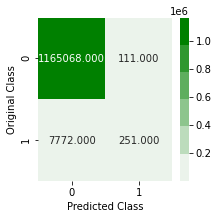

The ROC-AUC Score obtained on CV set is :  0.5099890107189377
The F1 scores of each class on CV set are :  [0.99652775 0.03837953]
The Macro F1-Score obtained on CV set is :  0.5174536409809918
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


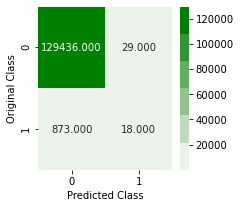

---------------------------------------- Test Confusion matrix ----------------------------------------


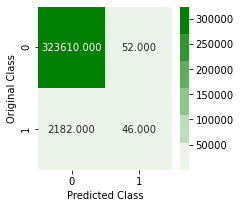

The F1 scores :  [0.99656019 0.03955288]
The Macro F1 score :  0.518056533981037
CPU times: user 22.9 s, sys: 61.3 ms, total: 22.9 s
Wall time: 22.9 s


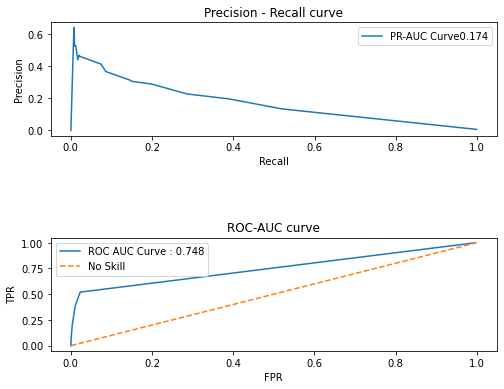

In [43]:
%%time
model = DecisionTreeClassifier(
            criterion = gridsrch.best_params_['criterion'],
            max_depth = gridsrch.best_params_['max_depth'])
model.fit(X_train, y_train)
plot_confusion_matrix(y_train, model.predict(X_train), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv), 'Cross Validation')
accuracy_check(model,X_test,y_test)

### Random Forest Classifier on Robust scaled Data

In [44]:
%%time
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
parameters = {
    'n_estimators' : [10,50,100,300,500,1000], 
    'max_depth' : [1,3,5,7]
}
clf = RandomizedSearchCV(model, parameters, cv = 3,  verbose = 10, scoring = 'roc_auc', n_iter = 5, n_jobs = -1)
gridsrch = clf.fit(X_train, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params :  {'n_estimators': 100, 'max_depth': 7}
Best Score :  0.9361650843187165
CPU times: user 3min 28s, sys: 2.24 s, total: 3min 30s
Wall time: 14min 10s


---------------------------------------- Training Confusion matrix ----------------------------------------


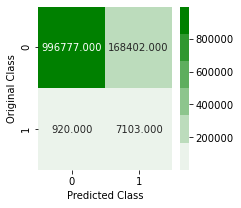

The ROC-AUC Score obtained on CV set is :  0.8675173704370785
The F1 scores of each class on CV set are :  [0.92214269 0.0771999 ]
The Macro F1-Score obtained on CV set is :  0.499671294603133
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


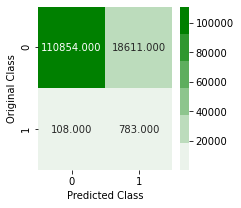

---------------------------------------- Test Confusion matrix ----------------------------------------


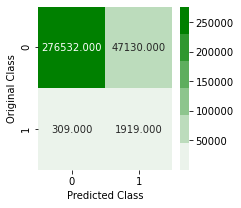

The F1 scores :  [0.92100123 0.07484837]
The Macro F1 score :  0.4979247999345704
CPU times: user 4min 24s, sys: 1.38 s, total: 4min 25s
Wall time: 1min 1s


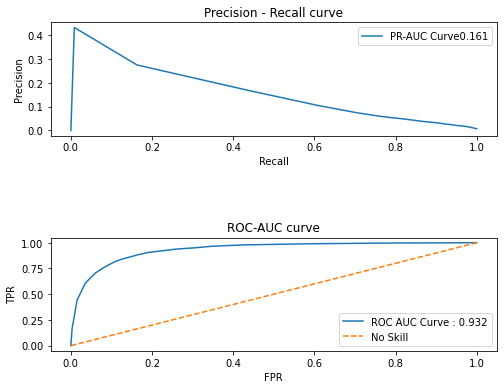

In [45]:
%%time
model = RandomForestClassifier(
            n_estimators = gridsrch.best_params_['n_estimators'],
            max_depth = gridsrch.best_params_['max_depth'],
            class_weight = "balanced_subsample", 
            n_jobs = -1)
model.fit(X_train, y_train)
plot_confusion_matrix(y_train, model.predict(X_train), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv), 'Cross Validation')
accuracy_check(model,X_test,y_test)

### Balanced Bagging classifier on Robust scaled Data

In [46]:
%%time
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = RandomizedSearchCV(model, parameters, cv = 3,  verbose = 10, scoring = 'roc_auc', n_iter = 5, n_jobs = -1)
gridsrch = clf.fit(X_train, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params :  {'n_estimators': 1000}
Best Score :  0.9650438438505589
CPU times: user 972 ms, sys: 1.05 s, total: 2.02 s
Wall time: 18min 10s


---------------------------------------- Training Confusion matrix ----------------------------------------


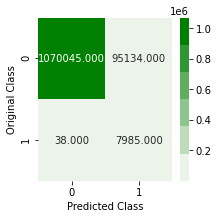

The ROC-AUC Score obtained on CV set is :  0.9199787236283586
The F1 scores of each class on CV set are :  [0.95665411 0.13250584]
The Macro F1-Score obtained on CV set is :  0.5445799791872363
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


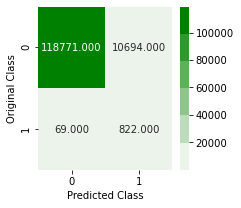

---------------------------------------- Test Confusion matrix ----------------------------------------


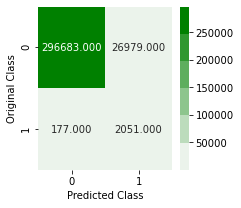

The F1 scores :  [0.95623685 0.13123041]
The Macro F1 score :  0.5437336253843814
CPU times: user 25.4 s, sys: 2.39 s, total: 27.8 s
Wall time: 7min 20s


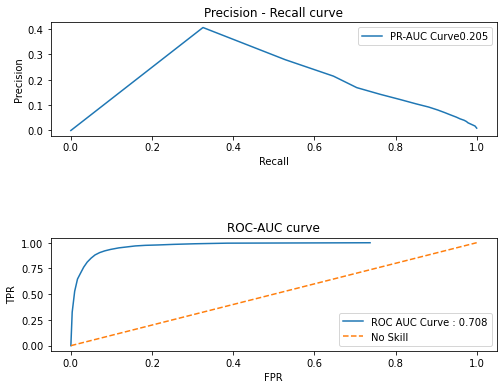

In [47]:
%%time
model = BalancedBaggingClassifier(
            n_estimators = gridsrch.best_params_['n_estimators'],
            n_jobs = -1)
model.fit(X_train, y_train)
plot_confusion_matrix(y_train, model.predict(X_train), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv), 'Cross Validation')

accuracy_check(model,X_test,y_test)

### XGBoost classifier on Robust scaled Data

In [48]:
!pip3 install tqdm

In [49]:
import random
from tqdm import tqdm
def custom_loops(x_train,y_train,classifier, param_range, folds):
#     trainscores = []
    testscores  = []
    #Referance - https://www.geeksforgeeks.org/python-random-sample-function/
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    
    lst = random.sample(param_range,5)
    lst.sort()
    
    params = {'n_estimators':lst}
    
    for k in tqdm(params['n_estimators']):
        testscores_folds  = []
        for fold in range(0, folds):
            #2.devide numbers ranging from  0 to len(X_train) into groups= folds
            block_size = int(len(x_train)/folds)
            test_indices = list(set(list(range((block_size*fold), (block_size*(fold+1))))))
            train_indices  = list(set(list(range(1, len(x_train)))) - set(test_indices))
            # selecting the data points based on the train_indices and test_indices
            X_train = pd.DataFrame(x_train).iloc[train_indices]
            Y_train = pd.DataFrame(y_train).iloc[train_indices]
            X_test  = pd.DataFrame(x_train).iloc[test_indices]
            Y_test  = pd.DataFrame(y_train).iloc[test_indices]
    
            classifier.n_estimators = k
            classifier.fit(X_train,Y_train)
    
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(f1_score(Y_test, Y_predicted, average = 'macro'))
    
        testscores.append(np.mean(np.array(testscores_folds)))
    return testscores,params

In [50]:
%%time
model = XGBClassifier(nthread=-1)
parameters = [10,50,100,300,500,1000]
#clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
#gridsrch = clf.fit(X_train, y_train)

testscores,paramsopt = custom_loops(X_train, y_train, model, parameters, 3)
print("Params : " , paramsopt)
print("Scores : " , testscores)

  0%|          | 0/5 [00:00<?, ?it/s]

[14:42:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|██        | 1/5 [00:11<00:46, 11.74s/it]

[14:42:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:42:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████      | 2/5 [00:52<01:26, 28.97s/it]

[14:43:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:44:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:45:41] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|██████    | 3/5 [04:45<04:04, 122.02s/it]

[14:46:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:49:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:51:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████  | 4/5 [11:08<03:45, 225.20s/it]

[14:53:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:57:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:01:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 5/5 [23:32<00:00, 282.54s/it]

Params :  {'n_estimators': [10, 50, 300, 500, 1000]}
Scores :  [0.5010244184535769, 0.5461729764736679, 0.6273638740067524, 0.6585902116956097, 0.6978457280301775]
CPU times: user 3h 6min 35s, sys: 1.78 s, total: 3h 6min 36s
Wall time: 23min 32s


[15:07:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------------------------- Training Confusion matrix ----------------------------------------


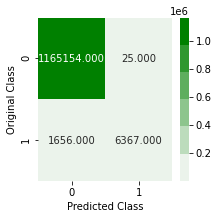

The ROC-AUC Score obtained on CV set is :  0.6754097574048912
The F1 scores of each class on CV set are :  [0.99753707 0.49486166]
The Macro F1-Score obtained on CV set is :  0.7461993646535316
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


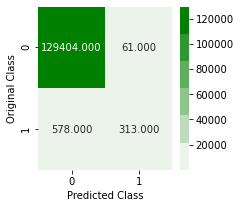

---------------------------------------- Test Confusion matrix ----------------------------------------


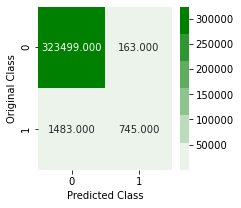

The F1 scores :  [0.9974624  0.47512755]
The Macro F1 score :  0.7362949747504652
CPU times: user 51min 54s, sys: 396 ms, total: 51min 54s
Wall time: 6min 51s


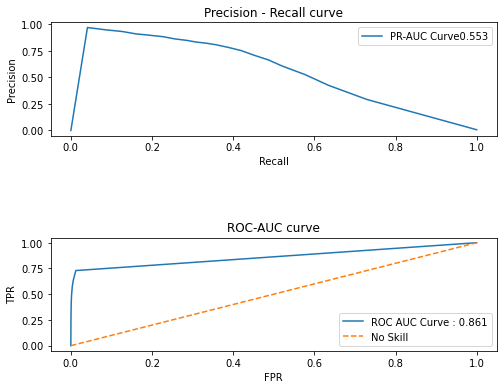

In [51]:
%%time
model = XGBClassifier(
            n_estimators = 1000,
            nthread = -1)
model.fit(X_train, y_train)
plot_confusion_matrix(y_train, model.predict(X_train), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv), 'Cross Validation')
accuracy_check(model,X_test,y_test)

### Adaboost classifier on Robust scaled Data

In [42]:
%%time
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
gridsrch = clf.fit(X_train, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9401228188639209
CPU times: user 20min 54s, sys: 37.6 s, total: 21min 32s
Wall time: 1h 12min 53s


---------------------------------------- Training Confusion matrix ----------------------------------------


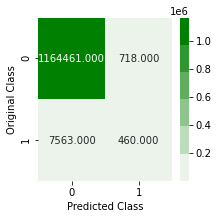

The ROC-AUC Score obtained on CV set is :  0.5350098131120029
The F1 scores of each class on CV set are :  [0.99646858 0.12080537]
The Macro F1-Score obtained on CV set is :  0.5586369751413783
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


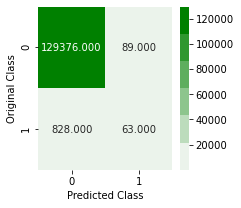

---------------------------------------- Test Confusion matrix ----------------------------------------


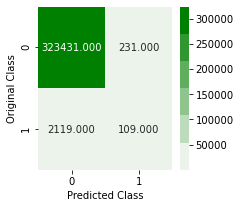

The F1 scores :  [0.99638023 0.08489097]
The Macro F1 score :  0.5406355964190894
CPU times: user 27min 46s, sys: 57.2 s, total: 28min 43s
Wall time: 28min 43s


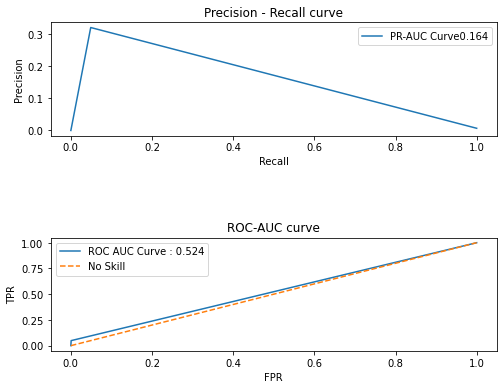

In [43]:
%%time
model = AdaBoostClassifier(n_estimators = gridsrch.best_params_['n_estimators'])
model.fit(X_train, y_train)
plot_confusion_matrix(y_train, model.predict(X_train), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv), 'Cross Validation')
accuracy_check(model,X_test,y_test)

### Custom Ensemble on Robust scaled Data

In [44]:
class Custom_ensemble_model:
    
    def __init__(self, base_model, meta_model, number_of_samples, sample_size):
        
        self.base_model = base_model
        self.meta_model = meta_model
        self.number_of_samples = number_of_samples
        self.sample_size = sample_size
        
    def base_model_split(self, D1_X, D1_y):
        
        X_sub_samples = []
        y_sub_samples = []
        
        #Run over all the subsamples
        for every_subsample in range(self.number_of_samples):
            #Create single subsample
            single_subsample = []
            possibilities = [0,1]
            #Create balanced dataset.
            for single_possibility in possibilities:
                samples = np.where(D1_y.values==single_possibility)[0]
                index_range = range(samples.shape[0])
                subsample_indexes = np.random.choice(index_range, size=self.sample_size, replace=True)
                single_subsample.extend(samples[subsample_indexes])
            X_sub_samples.append(D1_X[single_subsample])
            y_sub_samples.append(D1_y.values[single_subsample])
            
        return X_sub_samples, y_sub_samples
    
    def train_base_models(self, X_sub_samples, y_sub_samples):
        
        base_models_train_list = []
        
        for i in range(len(X_sub_samples)):
            X_sub_samples[i], y_sub_samples[i] = shuffle(X_sub_samples[i], y_sub_samples[i], random_state=0)
            base_models_train_list.append(self.base_model.fit(X_sub_samples[i],y_sub_samples[i]))
    
        return base_models_train_list

    def meta_model_dataset(self, base_models_train_list, D2_X, D2_y):
        
        meta_model_X = []
        meta_model_y = []
        
        for row in range(D2_X.shape[0]):
            for base_model in range(len(base_models_train_list)):
                prediction = base_models_train_list[base_model].predict(D2_X[row].reshape(1,-1))
                meta_model_X.append(prediction)
                meta_model_y.append(np.array(D2_y.values[row]))
        return meta_model_X, meta_model_y
    
    def train_meta_model(self, meta_model_X, meta_model_y):
        
        final_model = self.meta_model.fit(meta_model_X, meta_model_y)
        print("ROC-AUC score of meta model : " , roc_auc_score(meta_model_y, final_model.predict_proba(meta_model_X)[:, 1]))
        return final_model

In [45]:
%%time
base_model = DecisionTreeClassifier()
meta_model = XGBClassifier(n_estimators=300, nthread=-1, n_jobs=-1)

DT1_X, DT2_X, DT1_y, DT2_y = train_test_split(X_train, y_train, random_state = 42 ,stratify=y_train, test_size=0.10)

custom_ensemble_model = Custom_ensemble_model(base_model, meta_model, 100, 10000)
X_subsamples_list, y_subsamples_list = custom_ensemble_model.base_model_split(DT1_X, DT1_y)
base_models = custom_ensemble_model.train_base_models(X_subsamples_list, y_subsamples_list)
meta_model_X, meta_model_y = custom_ensemble_model.meta_model_dataset(base_models, DT2_X, DT2_y)
meta_model_final = custom_ensemble_model.train_meta_model(np.array(meta_model_X).reshape(-1,1) , np.array(meta_model_y).reshape(-1,1))
meta_model_X, meta_model_y = [], []

# test_X_remove, test_X, test_y_remove, test_y = train_test_split(X_test, y_test, random_state = 42 ,stratify=y_test, test_size=0.20)

# test_X_custom_model, test_y_custom_model = custom_ensemble_model.meta_model_dataset(base_models, test_X, test_y)
# accuracy_check(meta_model_final, np.array(test_X_custom_model).reshape(-1,1), np.array(test_y_custom_model).reshape(-1,1))

[05:15:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC-AUC score of meta model :  0.8576382788512289
CPU times: user 23min 30s, sys: 12.2 s, total: 23min 42s
Wall time: 15min 16s


---------------------------------------- Test Confusion matrix ----------------------------------------


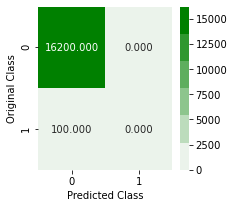

The F1 scores :  [0.99692308 0.        ]
The Macro F1 score :  0.49846153846153846
CPU times: user 51.8 s, sys: 39.2 ms, total: 51.8 s
Wall time: 51.4 s


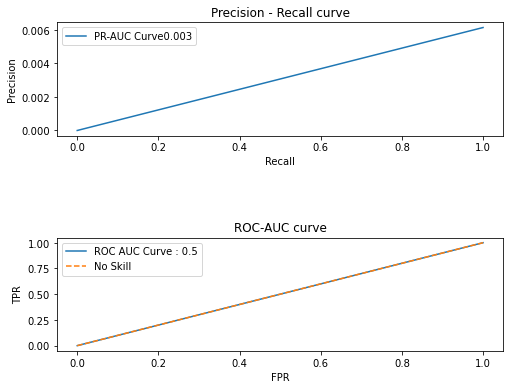

In [46]:
%%time
test_X_remove, test_X, test_y_remove, test_y = train_test_split(X_test, y_test, random_state = 42 ,stratify=y_test, test_size=0.0005)
test_X_custom_model, test_y_custom_model = custom_ensemble_model.meta_model_dataset(base_models, test_X, test_y)
accuracy_check(meta_model_final, np.array(test_X_custom_model).reshape(-1,1), np.array(test_y_custom_model).reshape(-1,1))

### Decision Tree Classifier on Log transformed and standard scaled Data

In [47]:
%%time
model = DecisionTreeClassifier()
parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10,12]
}
clf = RandomizedSearchCV(model, parameters, scoring = 'roc_auc', n_jobs=-1)
gridsrch = clf.fit(X_train_log, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Best Params :  {'max_depth': 8, 'criterion': 'entropy'}
Best Score :  0.9316775985007787
CPU times: user 7.67 s, sys: 761 ms, total: 8.43 s
Wall time: 1min 7s


---------------------------------------- Training Confusion matrix ----------------------------------------


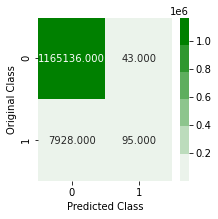

The ROC-AUC Score obtained on CV set is :  0.5010875760267487
The F1 scores of each class on CV set are :  [0.99654363 0.00443459]
The Macro F1-Score obtained on CV set is :  0.5004891089181579
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


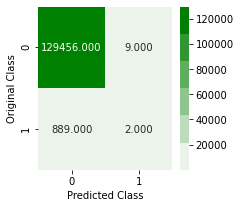

---------------------------------------- Test Confusion matrix ----------------------------------------


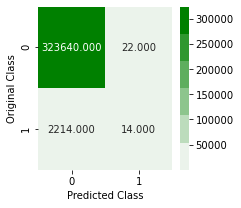

The F1 scores :  [0.99655744 0.01236749]
The Macro F1 score :  0.5044624638902091
CPU times: user 21.8 s, sys: 28 ms, total: 21.9 s
Wall time: 21.8 s


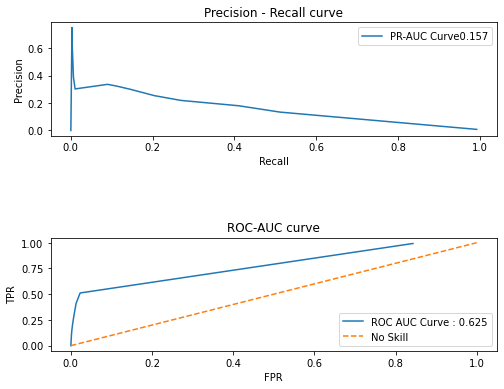

In [48]:
%%time
model = DecisionTreeClassifier(
            criterion = gridsrch.best_params_['criterion'],
            max_depth = gridsrch.best_params_['max_depth'])
model.fit(X_train_log, y_train)
plot_confusion_matrix(y_train, model.predict(X_train_log), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv_log), 'Cross Validation')

accuracy_check(model,X_test_log,y_test)

### Random Forest Classifier on Log transformed and standard scaled Data

In [49]:
%%time
model = RandomForestClassifier(class_weight = "balanced_subsample" , n_jobs = -1)
parameters = {
    'n_estimators' : [10,50,100,300,500,1000], 
    'max_depth' : [1,3,5,7]
}
clf = RandomizedSearchCV(model, parameters, scoring = 'roc_auc', n_jobs=-1)
gridsrch = clf.fit(X_train_log, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Best Params :  {'n_estimators': 1000, 'max_depth': 7}
Best Score :  0.9368956651927901
CPU times: user 41min 11s, sys: 11.3 s, total: 41min 23s
Wall time: 1h 21min 1s


---------------------------------------- Training Confusion matrix ----------------------------------------


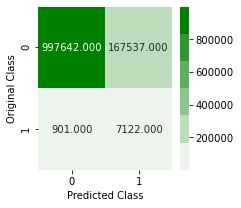

The ROC-AUC Score obtained on CV set is :  0.8686192243369859
The F1 scores of each class on CV set are :  [0.92277379 0.07783183]
The Macro F1-Score obtained on CV set is :  0.5003028097328748
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


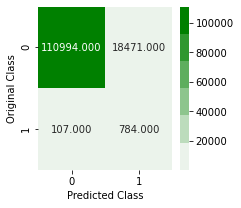

---------------------------------------- Test Confusion matrix ----------------------------------------


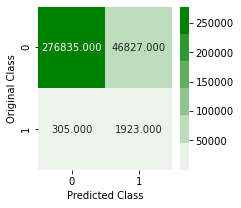

The F1 scores :  [0.92155153 0.07544431]
The Macro F1 score :  0.4984979177183212
CPU times: user 46min 48s, sys: 12.2 s, total: 47min 1s
Wall time: 8min 3s


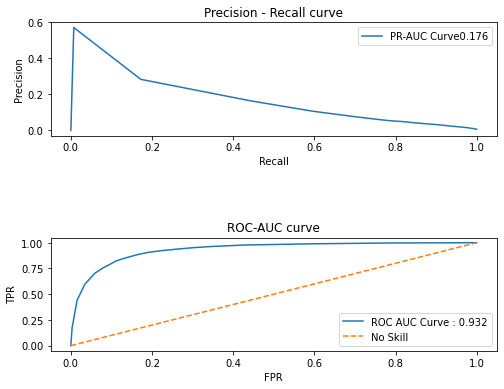

In [50]:
%%time
model = RandomForestClassifier(
            n_estimators = gridsrch.best_params_['n_estimators'],
            max_depth = gridsrch.best_params_['max_depth'],
            class_weight = "balanced_subsample", 
            n_jobs = -1)
model.fit(X_train_log, y_train)
plot_confusion_matrix(y_train, model.predict(X_train_log), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv_log), 'Cross Validation')

accuracy_check(model,X_test_log,y_test)

### Balanced Bagging classifier on Log transformed and standard scaled Data

In [51]:
model = BalancedBaggingClassifier(n_jobs = -1)
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
gridsrch = clf.fit(X_train_log, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9684490921198463


---------------------------------------- Training Confusion matrix ----------------------------------------


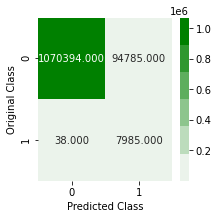

The ROC-AUC Score obtained on CV set is :  0.9195372798779126
The F1 scores of each class on CV set are :  [0.9567805  0.13268687]
The Macro F1-Score obtained on CV set is :  0.5447336862994457
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


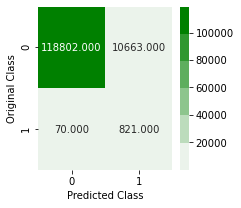

---------------------------------------- Test Confusion matrix ----------------------------------------


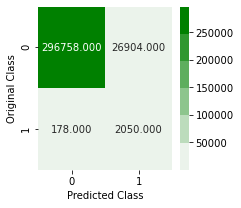

The F1 scores :  [0.95636144 0.13148611]
The Macro F1 score :  0.5439237793562582


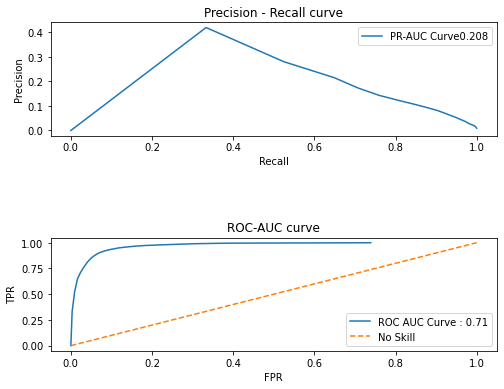

In [52]:
model = BalancedBaggingClassifier(
            n_estimators = gridsrch.best_params_['n_estimators'],
            n_jobs = -1)
model.fit(X_train_log, y_train)
plot_confusion_matrix(y_train, model.predict(X_train_log), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv_log), 'Cross Validation')

accuracy_check(model,X_test_log,y_test)

### XGBoost classifier on Log transformed and standard scaled Data

In [41]:
# %%time
# model = XGBClassifier(nthread=-1, n_jobs=-1)
# parameters = {'n_estimators' : [10,50,100,300,500,1000]}
# clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
# gridsrch = clf.fit(X_train_log, y_train)
# print("Best Params : " , gridsrch.best_params_)
# print("Best Score : " , gridsrch.best_score_)

[07:41:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Params :  {'n_estimators': 1000}
Best Score :  0.972790999354252
CPU times: user 54min 59s, sys: 1.09 s, total: 55min
Wall time: 2h 2min 16s


In [53]:
import random
from tqdm import tqdm
def custom_loops(x_train,y_train,classifier, param_range, folds):
    testscores  = []
    #Referance - https://www.geeksforgeeks.org/python-random-sample-function/
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params"
    
    lst = random.sample(param_range,5)
    lst.sort()
    
    params = {'n_estimators':lst}
    
    for k in tqdm(params['n_estimators']):
        testscores_folds  = []
        for fold in range(0, folds):
            #2.devide numbers ranging from  0 to len(X_train) into groups= folds
            block_size = int(len(x_train)/folds)
            test_indices = list(set(list(range((block_size*fold), (block_size*(fold+1))))))
            train_indices  = list(set(list(range(1, len(x_train)))) - set(test_indices))
            X_train = pd.DataFrame(x_train).iloc[train_indices]
            Y_train = pd.DataFrame(y_train).iloc[train_indices]
            X_test  = pd.DataFrame(x_train).iloc[test_indices]
            Y_test  = pd.DataFrame(y_train).iloc[test_indices]
    
            classifier.n_estimators = k
            classifier.fit(X_train,Y_train)
    
            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(f1_score(Y_test, Y_predicted, average = 'macro'))
    
        testscores.append(np.mean(np.array(testscores_folds)))
    return testscores,params

In [54]:
%%time
model = XGBClassifier(nthread=-1)
parameters = [10,50,100,300,500,1000]
#clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
#gridsrch = clf.fit(X_train, y_train)

testscores,paramsopt = custom_loops(X_train_log, y_train, model, parameters, 3)
print("Params : " , paramsopt)
print("Scores : " , testscores)

  0%|          | 0/5 [00:00<?, ?it/s]

[07:33:21] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:33:35] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:33:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 20%|██        | 1/5 [00:44<02:58, 44.70s/it]

[07:34:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:34:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:34:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 40%|████      | 2/5 [02:05<03:17, 65.90s/it]

[07:35:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:36:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:38:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 60%|██████    | 3/5 [06:04<04:50, 145.07s/it]

[07:39:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:41:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:43:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 80%|████████  | 4/5 [12:08<03:51, 231.30s/it]

[07:45:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:49:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:53:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 5/5 [23:41<00:00, 284.31s/it]

Params :  {'n_estimators': [50, 100, 300, 500, 1000]}
Scores :  [0.5462730824495994, 0.5709103739719259, 0.6317776680594849, 0.6606885765951587, 0.699680425280849]
CPU times: user 3h 7min 49s, sys: 2.4 s, total: 3h 7min 52s
Wall time: 23min 41s


[07:57:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
---------------------------------------- Training Confusion matrix ----------------------------------------


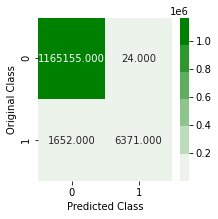

The ROC-AUC Score obtained on CV set is :  0.6574755784001527
The F1 scores of each class on CV set are :  [0.99743723 0.45802771]
The Macro F1-Score obtained on CV set is :  0.7277324706503238
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


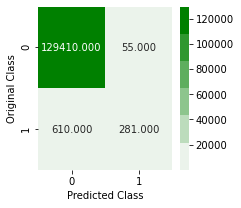

---------------------------------------- Test Confusion matrix ----------------------------------------


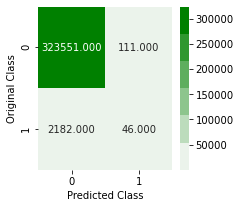

The F1 scores :  [0.99646902 0.03857442]
The Macro F1 score :  0.5175217223229691
CPU times: user 48min 11s, sys: 470 ms, total: 48min 12s
Wall time: 6min 22s


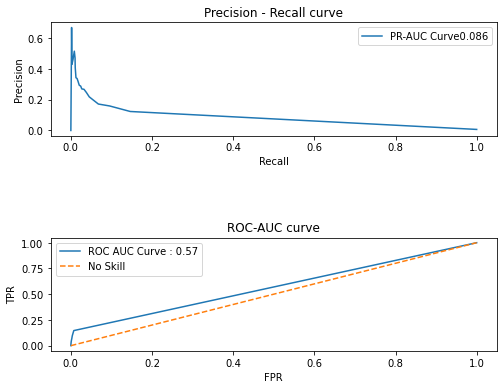

In [55]:
%%time
model = XGBClassifier(
            n_estimators = 1000,
            nthread = -1, 
            n_jobs=-1)
model.fit(X_train_log, y_train)
plot_confusion_matrix(y_train, model.predict(X_train_log), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv_log), 'Cross Validation')

accuracy_check(model,X_test_log,y_test)

### Adaboost classifier on Log transformed and standard scaled Data

In [56]:
%%time
model = AdaBoostClassifier()
parameters = {'n_estimators' : [10,50,100,300,500,1000]}
clf = RandomizedSearchCV(model, parameters,scoring = 'roc_auc', n_jobs=-1)
gridsrch = clf.fit(X_train_log, y_train)
print("Best Params : " , gridsrch.best_params_)
print("Best Score : " , gridsrch.best_score_)

Best Params :  {'n_estimators': 1000}
Best Score :  0.9399416563817754
CPU times: user 22min 55s, sys: 952 ms, total: 22min 56s
Wall time: 1h 8min 26s


---------------------------------------- Training Confusion matrix ----------------------------------------


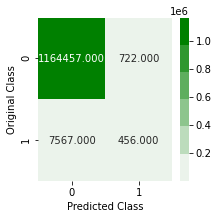

The ROC-AUC Score obtained on CV set is :  0.534425473598223
The F1 scores of each class on CV set are :  [0.99644156 0.11832061]
The Macro F1-Score obtained on CV set is :  0.5573810829638208
---------------------------------------- Cross Validation Confusion matrix ----------------------------------------


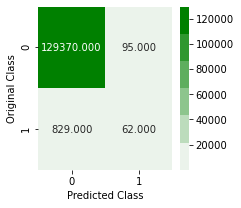

---------------------------------------- Test Confusion matrix ----------------------------------------


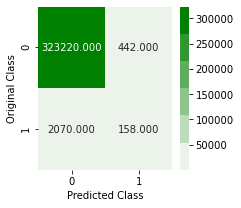

The F1 scores :  [0.99612914 0.11173975]
The Macro F1 score :  0.5539344445034765
CPU times: user 29min 48s, sys: 442 ms, total: 29min 49s
Wall time: 29min 49s


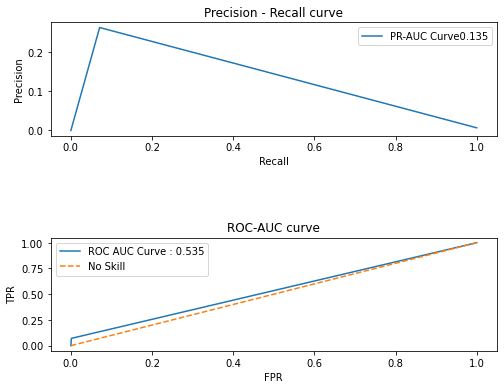

In [57]:
%%time
model = AdaBoostClassifier(n_estimators = gridsrch.best_params_['n_estimators'])
model.fit(X_train_log, y_train)
plot_confusion_matrix(y_train, model.predict(X_train_log), 'Training')
print("The ROC-AUC Score obtained on CV set is : " ,roc_auc_score(y_cv, model.predict(X_cv_log)))
print("The F1 scores of each class on CV set are : ",f1_score(y_cv, model.predict(X_cv_log),average = None))
print("The Macro F1-Score obtained on CV set is : " , f1_score(y_cv, model.predict(X_cv_log),average = 'macro'))
plot_confusion_matrix(y_cv, model.predict(X_cv_log), 'Cross Validation')

accuracy_check(model,X_test_log,y_test)

### MLP on Robust scaled Data

In [64]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import initializers
import tensorflow as tf
from sklearn.metrics import roc_auc_score


metrics = [
    keras.metrics.AUC(name='roc_auc'),
    keras.metrics.AUC(name='pr_auc', curve='PR'),
]

In [65]:
mlp_model = Sequential()
mlp_model.add(Dense(15, input_dim=21, activation='tanh'))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)

mlp_model_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_cv, y_cv),use_multiprocessing=True)

Epoch 1/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0500 - roc_auc: 0.8130 - pr_auc: 0.0441 - val_loss: 0.0264 - val_roc_auc: 0.9218 - val_pr_auc: 0.1852
Epoch 2/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0268 - roc_auc: 0.9157 - pr_auc: 0.1795 - val_loss: 0.0262 - val_roc_auc: 0.9302 - val_pr_auc: 0.1934
Epoch 3/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0262 - roc_auc: 0.9191 - pr_auc: 0.1822 - val_loss: 0.0260 - val_roc_auc: 0.9280 - val_pr_auc: 0.1916
Epoch 4/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0263 - roc_auc: 0.9204 - pr_auc: 0.1843 - val_loss: 0.0260 - val_roc_auc: 0.9252 - val_pr_auc: 0.1876
Epoch 5/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0263 - roc_auc: 0.9222 - pr_auc: 0.1912 - val_loss: 0.0261 - val_roc_auc: 0.9270 - val_pr_auc: 0.1900
Epoch 6/10
18332/18332 [==============================] - 23s 1ms/step - loss: 0.0265

In [66]:
print(mlp_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                330       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________
None


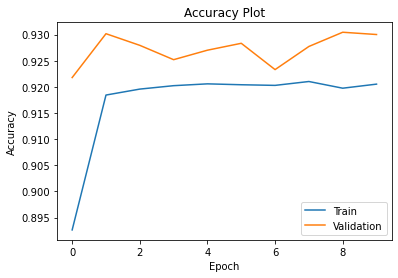

In [67]:
plot.plot(mlp_model_history.history['roc_auc'])
plot.plot(mlp_model_history.history['val_roc_auc'])
plot.title('Accuracy Plot')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Validation'])
plot.show()

In [69]:
mlp_results = mlp_model.evaluate(X_test, y_test, batch_size=64, verbose=0)
for name, value in zip(mlp_model.metrics_names, mlp_results):
    print(name, ': ', value)

loss :  0.026836572214961052
roc_auc :  0.9172110557556152
pr_auc :  0.17135468125343323


---------------------------------------- Test Confusion matrix ----------------------------------------


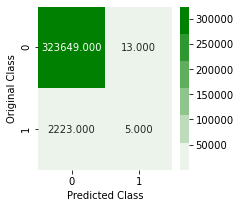

In [70]:
mlp_test_pred_15 = mlp_model.predict_classes(X_test)
plot_confusion_matrix(y_test, mlp_test_pred_15, 'Test')

In [71]:
# Reference - http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Data", "Model", "Test Precision Recall AUC", "Test ROC-AUC"]

x.add_row(["Robust Scaled Data", "Decision Tree", 0.0174, 0.748])
x.add_row(["Robust Scaled Data", "Random Forest", 0.161, 0.932])
x.add_row(["Robust Scaled Data", "Balanced Bagging Classifier", 0.205, 0.708])
x.add_row(["Robust Scaled Data", "XGBoost Classifier", 0.553, 0.861])
x.add_row(["Robust Scaled Data", "AdaBoost Classifier", 0.164, 0.524])
x.add_row(["Robust Scaled Data", "Custom Ensemble Model", 0.003, 0.5])
x.add_row(["Robust Scaled Data", "Perceptron Model", 0.171, 0.917])
x.add_row(["Log Transformed Standard Scaled Data", "Decision Tree", 0.157, 0.625])
x.add_row(["Log Transformed Standard Scaled Data", "Random Forest", 0.176, 0.932])
x.add_row(["Log Transformed Standard Scaled Data", "Balanced Bagging Classifier", 0.208, 0.71])
x.add_row(["Log Transformed Standard Scaled Data", "XGBoost Classifier", 0.086, 0.57])
x.add_row(["Log Transformed Standard Scaled Data", "AdaBoost Classifier", 0.135, 0.535])

print(x)

+--------------------------------------+-----------------------------+---------------------------+--------------+
|                 Data                 |            Model            | Test Precision Recall AUC | Test ROC-AUC |
+--------------------------------------+-----------------------------+---------------------------+--------------+
|          Robust Scaled Data          |        Decision Tree        |           0.0174          |    0.748     |
|          Robust Scaled Data          |        Random Forest        |           0.161           |    0.932     |
|          Robust Scaled Data          | Balanced Bagging Classifier |           0.205           |    0.708     |
|          Robust Scaled Data          |      XGBoost Classifier     |           0.553           |    0.861     |
|          Robust Scaled Data          |     AdaBoost Classifier     |           0.164           |    0.524     |
|          Robust Scaled Data          |    Custom Ensemble Model    |           0.003  

In conclusion we can say for both **Robust Scaled and Log Transformed Data Random Forest** give us the best result which have **ROC-AUC Score 0.932**. 